## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

## Import dataset

In [2]:
df= pd.read_csv('clean_df.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,management,high
11987,0.74,0.95,5,266,10,0,0,1,management,high
11988,0.85,0.54,3,185,10,0,0,1,management,high
11989,0.33,0.65,3,172,10,0,0,1,marketing,high


### Prepare the dataset

##### There are 2 variables that we need to deal with: salary (since they're ordinal, we'll replace the words with values) and department (we need to create dummies for this one).

In [3]:
dummies = pd.get_dummies(df['department'], drop_first=False)
df1 = pd.concat([df,dummies], axis=1)
df1

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,management,high,0,0,0,0,1,0,0,0,0,0
11987,0.74,0.95,5,266,10,0,0,1,management,high,0,0,0,0,1,0,0,0,0,0
11988,0.85,0.54,3,185,10,0,0,1,management,high,0,0,0,0,1,0,0,0,0,0
11989,0.33,0.65,3,172,10,0,0,1,marketing,high,0,0,0,0,0,1,0,0,0,0


In [4]:
df2 = df1.replace({"salary": {'low': 0, 'medium': 1, 'high': 2}})
df2

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,management,2,0,0,0,0,1,0,0,0,0,0
11987,0.74,0.95,5,266,10,0,0,1,management,2,0,0,0,0,1,0,0,0,0,0
11988,0.85,0.54,3,185,10,0,0,1,management,2,0,0,0,0,1,0,0,0,0,0
11989,0.33,0.65,3,172,10,0,0,1,marketing,2,0,0,0,0,0,1,0,0,0,0


In [5]:
df2.drop('department', axis=1, inplace=True)

### This dataset will be useful for the random forest model, so we save it.

In [6]:
df2.to_csv('to_forest_df.csv')

### Remove outliers

In [7]:
df3 = df2[df2['time_spend_company'] < 6]

##### Logistic regression doesn't deal well with outliers so let's first try removing them. We need to check now for the new balance

In [8]:
df3.groupby('left').count()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
left,,,,,,,,,,,,,,,,,,
0,9285,9285,9285,9285,9285,9285,9285,9285,9285,9285,9285,9285,9285,9285,9285,9285,9285,9285
1,1882,1882,1882,1882,1882,1882,1882,1882,1882,1882,1882,1882,1882,1882,1882,1882,1882,1882


##### Balance is practically the same so we can move forward as is

### Create X and Y datasets

In [9]:
x_df = df3.drop('left', axis=1)
x_df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11976,0.72,0.64,4,192,3,0,0,1,0,0,0,0,0,0,0,1,0,0
11977,0.48,0.50,5,142,4,0,0,1,1,0,0,0,0,0,0,0,0,0
11978,0.19,0.79,4,229,4,0,0,1,0,0,0,0,0,0,1,0,0,0
11983,0.62,0.85,3,237,3,1,0,1,1,0,0,0,0,0,0,0,0,0


In [10]:
y_df = df3['left']
y_df

0        1
2        1
3        1
4        1
5        1
        ..
11976    0
11977    0
11978    0
11983    0
11990    0
Name: left, Length: 11167, dtype: int64

### Divide data into training and testing sets

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.25, stratify=y_df, random_state=42)

### Train Model

In [12]:
log_model = LogisticRegression(random_state=42, max_iter=1000).fit(x_train, y_train)

### Get predictions

In [13]:
y_predictions = log_model.predict(x_test)

### Show Confusion Matrix

Text(33.0, 0.5, 'True')

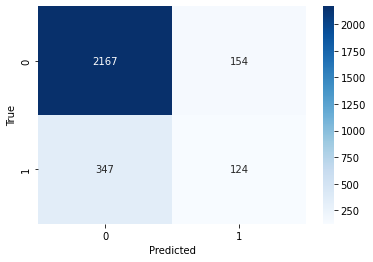

In [14]:
log_confusion_matrix = confusion_matrix(y_test, y_predictions, labels=log_model.classes_)
sbn.heatmap(log_confusion_matrix, fmt='d', cmap="Blues", annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

### Evaluate key performance metrics

In [15]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2321
           1       0.45      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



### This model as is shows:
##### - Accuracy: 82%
##### - Precision: 79%
##### - Recall: 82%
##### - F1 Score: 80%

Text(0.5, 1.0, 'Feature Importance')

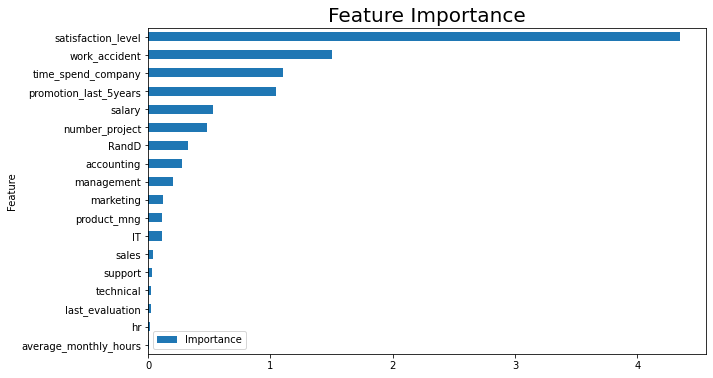

In [16]:
coefficients = log_model.coef_[0]

feature_importance = pd.DataFrame({'Feature': x_df.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title(label='Feature Importance', fontdict= {'fontsize': 20,
 'fontweight' : 10,
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'})

## Because the priority of the company is to retain workers, we want to focus on predicting correctly the workers that left. We'll use the recall metric to assess this model's performance.

##### Even though the overall recall is 82%, the recall for the people that left (meaning, how many people that left the model managed to identify) is only 26%. This may be because of imbalance but it's still very low.

## Let's try again but using a cross-validation technique to choose the best parameter for maximum iterations

In [17]:
x_trainv2, x_testv2, y_trainv2, y_testv2 = train_test_split(x_df, y_df, test_size=0.25, stratify=y_df, random_state=42)

In [18]:
para=[{'max_iter':[100,300,500,800,1000,5000,10000]}]
clf=GridSearchCV(LogisticRegression(), param_grid=para, cv=5, scoring='recall')

In [19]:
clf.fit(x_trainv2, y_trainv2)

C:\Users\atvid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\atvid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'max_iter': [100, 300, 500, 800, 1000, 5000, 10000]}],
             scoring='recall')

In [20]:
y_predictionsv2 = clf.predict(x_testv2)

Text(33.0, 0.5, 'True')

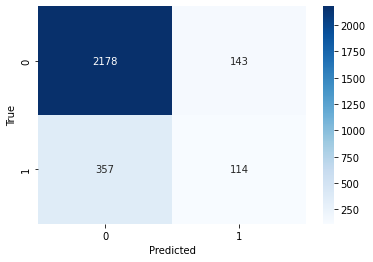

In [21]:
log_confusion_matrixv2 = confusion_matrix(y_testv2, y_predictionsv2, labels=clf.classes_)
sbn.heatmap(log_confusion_matrixv2, fmt='d', cmap="Blues", annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [22]:
print(classification_report(y_testv2, y_predictionsv2))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2321
           1       0.44      0.24      0.31       471

    accuracy                           0.82      2792
   macro avg       0.65      0.59      0.61      2792
weighted avg       0.79      0.82      0.80      2792



##### Because the recall on the employees that left is worse for this model (24%), we'll discard it and keep the first one.